In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
train = pd.read_csv('C:/Users/Amit Darak/Analytics Vidhya/Loan Prediction/train.csv')
test = pd.read_csv('C:/Users/Amit Darak/Analytics Vidhya/Loan Prediction/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [4]:
#To check if number of columns are same in both, as we need to have equal number of columns to concat two datasets
train.columns.equals(test.columns)

False

In [5]:
#To check which features are different
train.columns.difference(test.columns)

Index(['Loan_Status'], dtype='object')

In [6]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [7]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#To concat, you need equal number of columns. Hence add extra column in test data
test['Loan_Status'] = ' '

In [10]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 13)


In [11]:
alldata = pd.concat([train, test], ignore_index=True)

In [12]:
alldata.shape

(981, 13)

In [13]:
alldata.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [14]:
alldata.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,


In [15]:
#Check datatypes
alldata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
#Check null values
alldata.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

# Check distributions

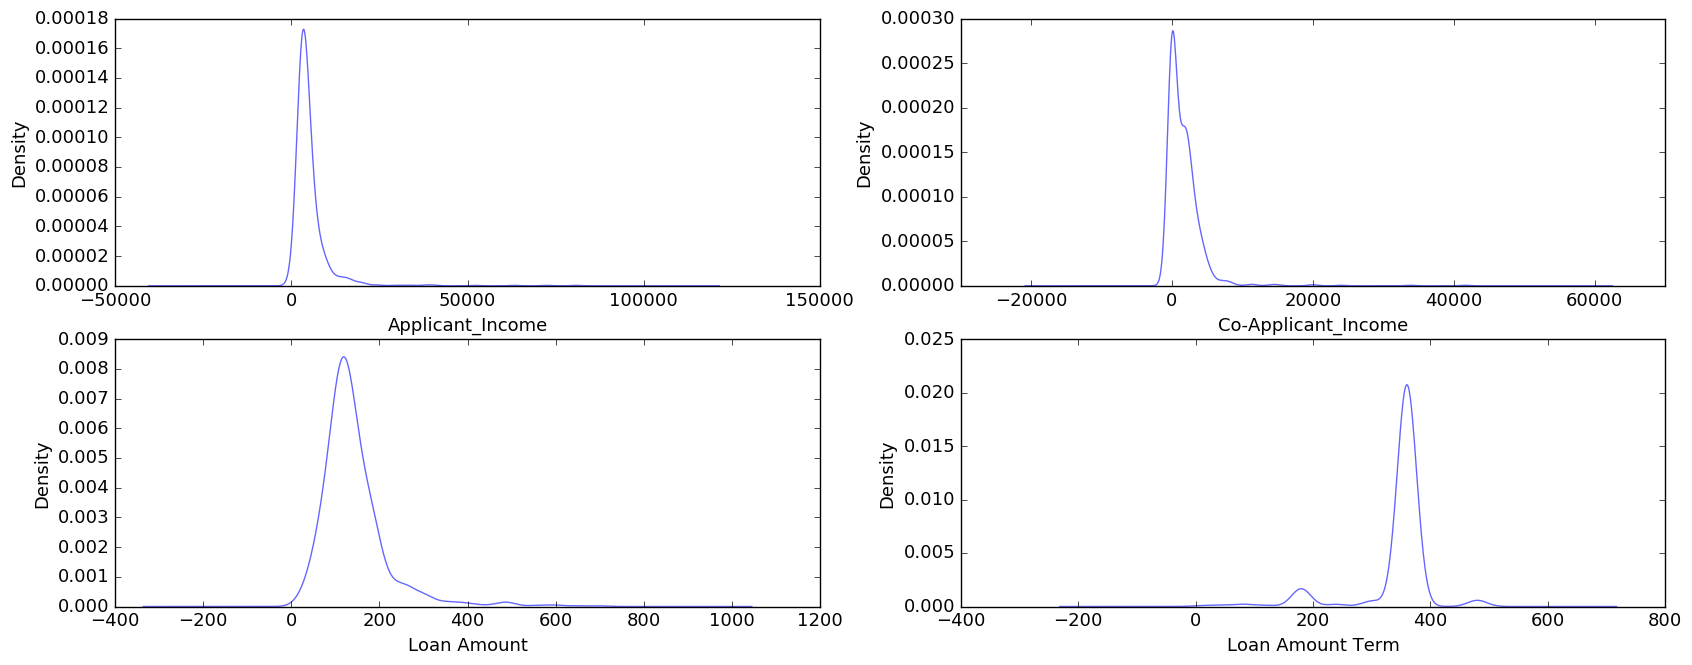

In [17]:
plt.rc("font", size=13)
plt.figure(figsize=(20,20))
alpha = 0.6

ax1 = plt.subplot2grid((5,2), (0,0))
alldata.ApplicantIncome.plot(kind="kde",alpha=alpha)
ax1.set_xlabel("Applicant_Income")

ax2 = plt.subplot2grid((5,2), (0,1))
alldata.CoapplicantIncome.plot(kind="kde",alpha=alpha)
ax2.set_xlabel("Co-Applicant_Income")

ax3 = plt.subplot2grid((5,2), (1,0))
alldata.LoanAmount.plot(kind="kde",alpha=alpha)
ax3.set_xlabel("Loan Amount")

ax4 = plt.subplot2grid((5,2), (1,1))
alldata.Loan_Amount_Term.plot(kind="kde",alpha=alpha)
ax4.set_xlabel("Loan Amount Term")

In [18]:
alldata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Explore individual columns

In [19]:
#explore columns
alldata['Gender'].describe()

count      957
unique       2
top       Male
freq       775
Name: Gender, dtype: object

In [20]:
alldata['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [21]:
alldata['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [22]:
alldata.Gender.isnull().sum()

24

In [23]:
alldata.Gender.fillna('Male', limit = 20, inplace=True)

In [24]:
alldata.Gender.isnull().sum()

4

In [25]:
alldata.Gender.fillna('Female', inplace = True)

In [26]:
alldata.Gender.isnull().sum()

0

# Explore Married column

In [27]:
alldata['Married'].describe()

count     978
unique      2
top       Yes
freq      631
Name: Married, dtype: object

In [28]:
alldata['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [29]:
alldata['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [30]:
alldata['Married'].isnull().sum()

3

In [31]:
alldata['Married'].fillna('Yes', inplace = True)

In [32]:
alldata['Married'].isnull().sum()

0

# Explore Dependent Column

In [33]:
alldata['Dependents'].describe()

count     956
unique      4
top         0
freq      545
Name: Dependents, dtype: object

In [34]:
alldata['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [35]:
alldata['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [36]:
alldata['Dependents'].isnull().sum()

25

In [37]:
alldata['Dependents'] = alldata['Dependents'].str.rstrip('+')

In [38]:
alldata['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [39]:
alldata.Dependents.mode()

0    0
dtype: object

In [40]:
alldata['Dependents'].fillna(alldata['Dependents'].mode()[0], inplace= True)

In [41]:
alldata['Dependents'].isnull().sum()

0

# Explore Education column

In [42]:
alldata['Education'].describe()

count          981
unique           2
top       Graduate
freq           763
Name: Education, dtype: object

In [43]:
alldata['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [44]:
alldata['Education'].isnull().sum()

0

In [45]:
alldata['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

# Explore self employed column

In [46]:
alldata['Self_Employed'].describe()

count     926
unique      2
top        No
freq      807
Name: Self_Employed, dtype: object

In [47]:
alldata['Self_Employed'].isnull().sum()

55

In [48]:
alldata['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [49]:
alldata['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [50]:
alldata['Self_Employed'].fillna(alldata['Self_Employed'].mode()[0], inplace = True)

In [51]:
alldata['Self_Employed'].isnull().sum()

0

# Applicant income

In [52]:
alldata['ApplicantIncome'].isnull().sum()

0

In [53]:
alldata['ApplicantIncome'].describe()

count      981.000000
mean      5179.795107
std       5695.104533
min          0.000000
25%       2875.000000
50%       3800.000000
75%       5516.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [54]:
alldata['ApplicantIncome'].mode()

0    2500
dtype: int64

# Coapplicant income

In [55]:
alldata['CoapplicantIncome'].isnull().sum()

0

In [56]:
alldata['CoapplicantIncome'].mode()

0    0.0
dtype: float64

In [57]:
alldata['CoapplicantIncome'].describe()

count      981.000000
mean      1601.916330
std       2718.772806
min          0.000000
25%          0.000000
50%       1110.000000
75%       2365.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

# Loan Amount

In [58]:
alldata['LoanAmount'].isnull().sum()

27

In [59]:
alldata['LoanAmount'].describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [60]:
alldata['LoanAmount'].mean()

142.51153039832286

In [61]:
alldata['LoanAmount'].fillna(alldata['LoanAmount'].mean(), inplace = True)

In [62]:
alldata['LoanAmount'].isnull().sum()

0

# Loan Amount Term

In [63]:
alldata['Loan_Amount_Term'].isnull().sum()

20

In [64]:
alldata['Loan_Amount_Term'].describe()

count    961.000000
mean     342.201873
std       65.100602
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [65]:
alldata['Loan_Amount_Term'].unique()

array([ 360.,  120.,  240.,   nan,  180.,   60.,  300.,  480.,   36.,
         84.,   12.,  350.,    6.])

In [66]:
alldata['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [67]:
alldata['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [68]:
alldata['Loan_Amount_Term'].fillna(alldata['Loan_Amount_Term'].mode()[0], inplace = True)

In [69]:
alldata['Loan_Amount_Term'].isnull().sum()

0

# Credit History

In [70]:
alldata['Credit_History'].isnull().sum()

79

In [71]:
alldata['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [72]:
alldata['Credit_History'].fillna(alldata['Credit_History'].mode()[0], inplace = True)

In [73]:
alldata['Credit_History'].isnull().sum()

0

# Property Area

In [74]:
alldata['Property_Area'].isnull().sum()

0

In [75]:
alldata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Preparing data for model building

In [76]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 13)


In [77]:
alldata.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N


In [78]:
traindata = alldata.loc[0:613,]

In [79]:
testdata = alldata.loc[614:,]

In [80]:
print(traindata.shape)
print(testdata.shape)

(614, 13)
(367, 13)


In [81]:
#LoanID is not an important feature, hence delete it
del traindata['Loan_ID']
del testdata['Loan_ID']

In [82]:
print(traindata.shape)
print(testdata.shape)

(614, 12)
(367, 12)


In [83]:
from sklearn.cross_validation import train_test_split

In [84]:
traindata.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [85]:
#Splitting train data in dependent and independent variables
xtr = traindata[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
ytr = traindata[['Loan_Status']]

In [86]:
ytr.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [87]:
traindata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [88]:
xte = testdata[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [89]:
#Get dummy variables
final_train = pd.get_dummies(xtr)
final_test = pd.get_dummies(xte)

In [90]:
print(final_train.shape)
print(final_test.shape)

(614, 20)
(367, 20)


In [91]:
final_train.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,142.51153,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.00000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


In [92]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(final_train,ytr, test_size = 0.3, random_state = 101)

In [93]:
#First using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [94]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Amit Darak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
predicted = logreg.predict(x_test)

In [96]:
from sklearn import metrics

In [97]:
#Known as training accuracy
print(metrics.accuracy_score(y_test,predicted))

0.778378378378


# Using cross validation

In [98]:
from sklearn.cross_validation import cross_val_score

In [99]:
ytr.head(2)

,Loan_Status
0,Y
1,N


In [100]:
ytr.shape

(614, 1)

In [101]:
#As crossvalidation requires in (614,) format and not (614,1)
c, r = ytr.shape
ytr1 = ytr.values.reshape(c,)

In [102]:
scores = cross_val_score(logreg, final_train, ytr1, cv= 10, scoring='accuracy')
print(scores)

[ 0.79365079  0.82539683  0.7704918   0.75409836  0.78688525  0.78688525
  0.86885246  0.85245902  0.80327869  0.83606557]


In [103]:
print(scores.mean())

0.807806401249


# Another method - Standaradizing Coefficients

In [98]:
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
final_train_std = slc.fit_transform(final_train)

In [99]:
#Crossvalidation
x_train_std, x_test_std, y_train_std, y_test_std = train_test_split(final_train_std,ytr, test_size = 0.3, random_state = 101)

In [100]:
#Logistic regression
logreg = LogisticRegression()
logreg.fit(x_train_std,y_train_std)

C:\Users\Amit Darak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
predicted = logreg.predict(x_test_std)

In [102]:
#Known as training accuracy
print(metrics.accuracy_score(y_test_std,predicted))

0.778378378378


# Even after standardizing coefficients, accuracy remains the same

# Now we try Random forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
forest = RandomForestClassifier(n_estimators=1000, criterion='entropy', oob_score=True, random_state=1, n_jobs=-1)

In [105]:
forest.fit(x_train, y_train)

C:\Users\Amit Darak\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [106]:
predicted = forest.predict(x_test)

In [107]:
#Known as training accuracy
print(metrics.accuracy_score(y_test,predicted))

0.772972972973


# Use XG Boost

# Using SVM

In [108]:
from sklearn.svm import SVC

In [112]:
clf = SVC(kernel= 'linear')
clf.fit(x_train, y_train)

C:\Users\Amit Darak\Anaconda3\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
predicted = clf.predict(x_test)

In [114]:
#Known as training accuracy
print(metrics.accuracy_score(y_test,predicted))

0.751351351351


# Submission

In [104]:
final_prediction = logreg.predict(final_test)

In [105]:
submission = pd.DataFrame({'Loan_ID': test.Loan_ID, 'Loan_Status': final_prediction})

In [ ]:
submission.head(2)

In [106]:
submission.to_csv("Loan_Prediction_Solution1.csv", index=False)